Created on October 31st 2021 by Patrick Rotzetter

https://www.linkedin.com/in/rotzetter/

## Small experiment of document mining with various techniques Part 8

Let us use AWS Comprehend topic modeling for our sample documents

In [3]:
#initialize some parameters depending where you are running the experiment, adapt the parameters to your AWS environment
#bucket='mlsamplesdocs'
bucket='mynlpexperimentbucketforsagemaker'
#input_s3_url = "s3://mlsamplesdocs/"
#output_s3_url = "s3://mycomprehendoutputbucket2203"
input_s3_url = "s3://mynlpexperimentbucketforsagemaker/"
output_s3_url = "s3://mycomprehendoutputbucket3110"
#data_access_role_arn = "arn:aws:iam::012086180905:role/ComprehendS3Access"
data_access_role_arn = "arn:aws:iam::783491625988:role/ComprehendAccess"


In [4]:
#import boto and connect to Comprehend service

import boto3
from bson.json_util import loads, dumps, default

 
comprehend = boto3.client(service_name='comprehend', region_name='us-east-1')


In [5]:
# let us list the files available for analysis in the S3 bucket
s3 = boto3.client('s3')
subfolder=''
contents = s3.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
number_of_docs=0
filenames=[]
for f in contents:
    number_of_docs=number_of_docs+1
    print(f['Key'])
    filenames.append(f['Key'])


AI-bank-of-the-future-Can-banks-meet-the-AI-challenge-1.txt
Artificial Financial Intelligence.txt
Data machine the insurers using AI to reshape the industry Financial Times.txt
Digital-disruption-in-Insurance.txt
Impact-Big-Data-AI-in-the-Insurance-Sector.txt
Innovation_Artificial-Intelligence-in-Insurance-Whitepaper-deloitte-digital.txt
Insurance-2030-The-impact-of-AI-on-the-future-of-insurance-F.txt
Issues_Paper_on_Increasing_Digitalisation_in_Insurance_and_its_Potential_Impact_on_Consumer_Outcomes.txt
Kaggle State of Machine Learning and Data Science 2020.txt
Module-1-Lecture-Slides.txt
Technology-and-innovation-in-the-insurance-sector.txt
WEF_Governance_of_Chatbots_in_Healthcare_2020.txt
ai-360-research.txt
ai-insurance.txt
ai_in_insurance_web_0.txt
fra-2020-artificial-intelligence_en.txt
sigma-5-2020-en.txt
sigma1_2020_en.txt


In [6]:
# define the parameters for the topic detection job, input and output, detection mode and number of topics. We also need to pass a roel for teh job to be able to read the S3 bucket
input_doc_format = "ONE_DOC_PER_FILE"
number_of_topics = 10

In [5]:
input_data_config = {"S3Uri": input_s3_url, "InputFormat": input_doc_format}
output_data_config = {"S3Uri": output_s3_url}
 
start_topics_detection_job_result = comprehend.start_topics_detection_job(NumberOfTopics=number_of_topics,
                                                                              InputDataConfig=input_data_config,
                                                                              OutputDataConfig=output_data_config,
                                                                              DataAccessRoleArn=data_access_role_arn)
 
print('start_topics_detection_job_result: ' + dumps(start_topics_detection_job_result))
 
job_id = start_topics_detection_job_result["JobId"]
 
print('job_id: ' + job_id)

start_topics_detection_job_result: {"JobId": "7ab05ed172c1cb88e92f30ccf9267332", "JobArn": "arn:aws:comprehend:us-east-1:783491625988:topics-detection-job/7ab05ed172c1cb88e92f30ccf9267332", "JobStatus": "SUBMITTED", "ResponseMetadata": {"RequestId": "5314c1f5-f330-4071-ac1c-b9c861255dab", "HTTPStatusCode": 200, "HTTPHeaders": {"x-amzn-requestid": "5314c1f5-f330-4071-ac1c-b9c861255dab", "content-type": "application/x-amz-json-1.1", "content-length": "175", "date": "Sun, 14 Nov 2021 08:26:13 GMT"}, "RetryAttempts": 0}}
job_id: 7ab05ed172c1cb88e92f30ccf9267332


In [87]:

describe_topics_detection_job_result = comprehend.describe_topics_detection_job(JobId=job_id)
 
print('describe_topics_detection_job_result: ' + dumps(describe_topics_detection_job_result, default=default))
 

describe_topics_detection_job_result: {"TopicsDetectionJobProperties": {"JobId": "7ab05ed172c1cb88e92f30ccf9267332", "JobArn": "arn:aws:comprehend:us-east-1:783491625988:topics-detection-job/7ab05ed172c1cb88e92f30ccf9267332", "JobStatus": "COMPLETED", "SubmitTime": {"$date": 1636878374518}, "EndTime": {"$date": 1636879587287}, "InputDataConfig": {"S3Uri": "s3://mynlpexperimentbucketforsagemaker/", "InputFormat": "ONE_DOC_PER_FILE"}, "OutputDataConfig": {"S3Uri": "s3://mycomprehendoutputbucket3110/783491625988-TOPICS-7ab05ed172c1cb88e92f30ccf9267332/output/output.tar.gz"}, "NumberOfTopics": 10, "DataAccessRoleArn": "arn:aws:iam::783491625988:role/ComprehendAccess"}, "ResponseMetadata": {"RequestId": "33647dd6-6050-47a9-b6cc-70acb99f1a88", "HTTPStatusCode": 200, "HTTPHeaders": {"x-amzn-requestid": "33647dd6-6050-47a9-b6cc-70acb99f1a88", "content-type": "application/x-amz-json-1.1", "content-length": "597", "date": "Sun, 14 Nov 2021 10:09:07 GMT"}, "RetryAttempts": 0}}


In [88]:
outputfilename=describe_topics_detection_job_result['TopicsDetectionJobProperties']['OutputDataConfig']['S3Uri']

In [89]:
#outputfilename="s3://mycomprehendoutputbucket3110/783491625988-TOPICS-f91078fa9bcbed3c507d4bc8800ab733/output/output.tar.gz"
print(outputfilename)

s3://mycomprehendoutputbucket3110/783491625988-TOPICS-7ab05ed172c1cb88e92f30ccf9267332/output/output.tar.gz


In [90]:
def split_s3_path(s3_path):
    path_parts=s3_path.replace("s3://","").split("/")
    bucket=path_parts.pop(0)
    key="/".join(path_parts)
    return bucket, key

In [91]:
bucket, key = split_s3_path(outputfilename)

In [92]:
print(bucket)

mycomprehendoutputbucket3110


In [93]:
print(key)

783491625988-TOPICS-7ab05ed172c1cb88e92f30ccf9267332/output/output.tar.gz


In [94]:
s3.download_file(bucket,key,'./output.tar.gz')

In [96]:
!gunzip < output.tar.gz | tar -xv

x doc-topics.csv
x topic-terms.csv


In [7]:
import pandas as pd

In [8]:
import seaborn as sea
import matplotlib as plt

In [118]:
doc_topics=pd.read_csv('doc-topics.csv',lineterminator='\n')

In [119]:
topic_terms=pd.read_csv('topic-terms.csv',lineterminator='\n')

In [120]:
display(topic_terms)

,topic,term,weight
0,0,digital,0.013117
1,0,carrier,0.008877
2,0,insurance,0.024313
3,0,future,0.006721
4,0,claim,0.009707
...,...,...,...
95,9,european,0.010629
96,9,public,0.009611
97,9,interviewee,0.009182
98,9,decision,0.011236


[Text(0, 0, 'insurance'),
 Text(1, 0, 'digital'),
 Text(2, 0, 'claim'),
 Text(3, 0, 'carrier'),
 Text(4, 0, 'product'),
 Text(5, 0, 'future'),
 Text(6, 0, 'enable'),
 Text(7, 0, 'underwrite'),
 Text(8, 0, 'change'),
 Text(9, 0, 'partner')]

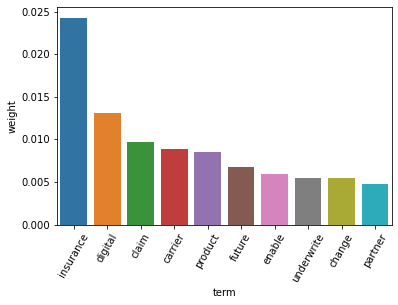

In [98]:
topic0_df=topic_terms[topic_terms['topic']==0]
plot=sea.barplot(x=topic0_df.term,y=topic0_df.weight,order=topic0_df.sort_values(by=['weight'], ascending=False).set_index('term').index)
plot.set_xticklabels(plot.get_xticklabels(),rotation=60)

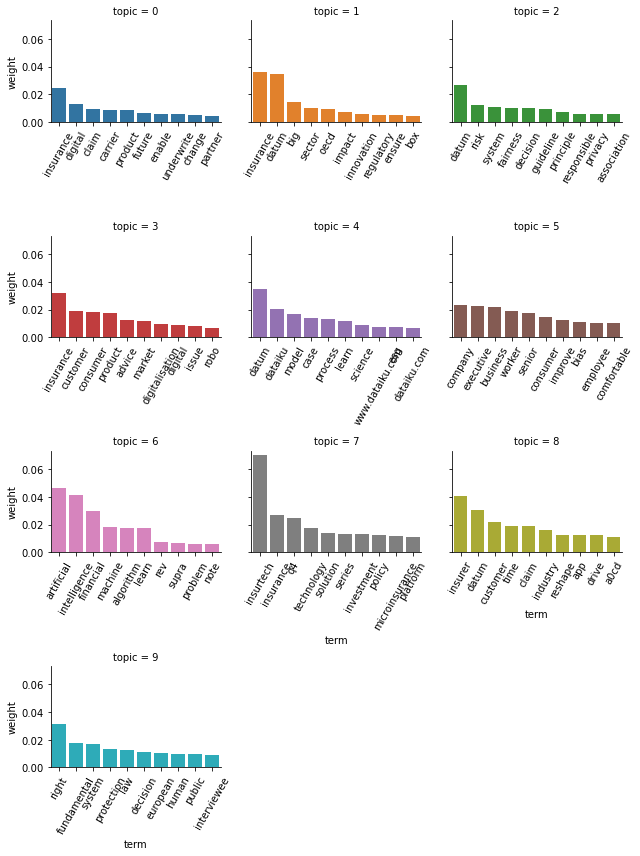

In [99]:
final_df = topic_terms.sort_values(by=['topic','weight'], ascending=False)
grid = sea.FacetGrid(final_df, col="topic", col_wrap=3,hue="topic",margin_titles=True, sharex=False)
grid_map=grid.map(sea.barplot,"term","weight",order=None);
for ax in grid_map.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
grid_map.tight_layout()

In [104]:
topic_keywords = []
for i in range(number_of_topics):
    keywords = []
    df_sub= topic_terms[topic_terms['topic']==i].sort_values(by=['weight'], ascending=False)
    keywords = ", ".join(df_sub['term'])
    i=i+1
    topic_keywords.append(keywords)
topic_keywords_df= pd.DataFrame(topic_keywords)

In [105]:
display(doc_topics)

,docname,topic,proportion
0,sigma1_2020_en.txt,0,0.708084
1,sigma1_2020_en.txt,3,0.161774
2,sigma1_2020_en.txt,2,0.031526
3,sigma1_2020_en.txt,8,0.028101
4,sigma1_2020_en.txt,7,0.022640
...,...,...,...
123,WEF_Governance_of_Chatbots_in_Healthcare_2020.txt,3,0.072151
124,WEF_Governance_of_Chatbots_in_Healthcare_2020.txt,6,0.032376
125,WEF_Governance_of_Chatbots_in_Healthcare_2020.txt,8,0.021235
126,WEF_Governance_of_Chatbots_in_Healthcare_2020.txt,7,0.016096


In [106]:
topics_df = pd.DataFrame()
for filename in filenames:
    sub_topics_df=doc_topics[doc_topics['docname']==filename].sort_values(by=['proportion'], ascending=False)
    row=sub_topics_df.iloc[0]
    topics_df = topics_df.append(pd.Series([row['docname'],int(row['topic']), round(row['proportion'],4)]), ignore_index=True)
topics_df.columns = ['Document name', 'Topic', 'Contribution']
topics_df

,Document name,Topic,Contribution
0,AI-bank-of-the-future-Can-banks-meet-the-AI-ch...,0.0,0.4028
1,Artificial Financial Intelligence.txt,6.0,0.8739
2,Data machine the insurers using AI to reshape ...,8.0,0.9783
3,Digital-disruption-in-Insurance.txt,0.0,0.7077
4,Impact-Big-Data-AI-in-the-Insurance-Sector.txt,1.0,0.8947
5,Innovation_Artificial-Intelligence-in-Insuranc...,4.0,0.3705
6,Insurance-2030-The-impact-of-AI-on-the-future-...,0.0,0.9648
7,Issues_Paper_on_Increasing_Digitalisation_in_I...,3.0,0.9071
8,Kaggle State of Machine Learning and Data Scie...,3.0,0.3374
9,Module-1-Lecture-Slides.txt,7.0,0.9267


In [107]:
#Top 3 Keywords for each Topic

topic_top3words = [(i,topic) for i, topics in enumerate(topic_keywords) for (j, topic) in enumerate(topics.split(',')) if j<3]
print(topic_top3words)

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)
df_top3words

[(0, 'insurance'), (0, ' digital'), (0, ' claim'), (1, 'insurance'), (1, ' datum'), (1, ' big'), (2, 'datum'), (2, ' risk'), (2, ' system'), (3, 'insurance'), (3, ' customer'), (3, ' consumer'), (4, 'datum'), (4, ' dataiku'), (4, ' model'), (5, 'company'), (5, ' executive'), (5, ' business'), (6, 'artificial'), (6, ' intelligence'), (6, ' financial'), (7, 'insurtech'), (7, ' insurance'), (7, ' q4'), (8, 'insurer'), (8, ' datum'), (8, ' customer'), (9, 'right'), (9, ' fundamental'), (9, ' system')]


,topic_id,words
0,0,"insurance, \n digital, \n claim"
1,1,"insurance, \n datum, \n big"
2,2,"datum, \n risk, \n system"
3,3,"insurance, \n customer, \n consumer"
4,4,"datum, \n dataiku, \n model"
5,5,"company, \n executive, \n business"
6,6,"artificial, \n intelligence, \n financial"
7,7,"insurtech, \n insurance, \n q4"
8,8,"insurer, \n datum, \n customer"
9,9,"right, \n fundamental, \n system"


(0.0, 7.0)

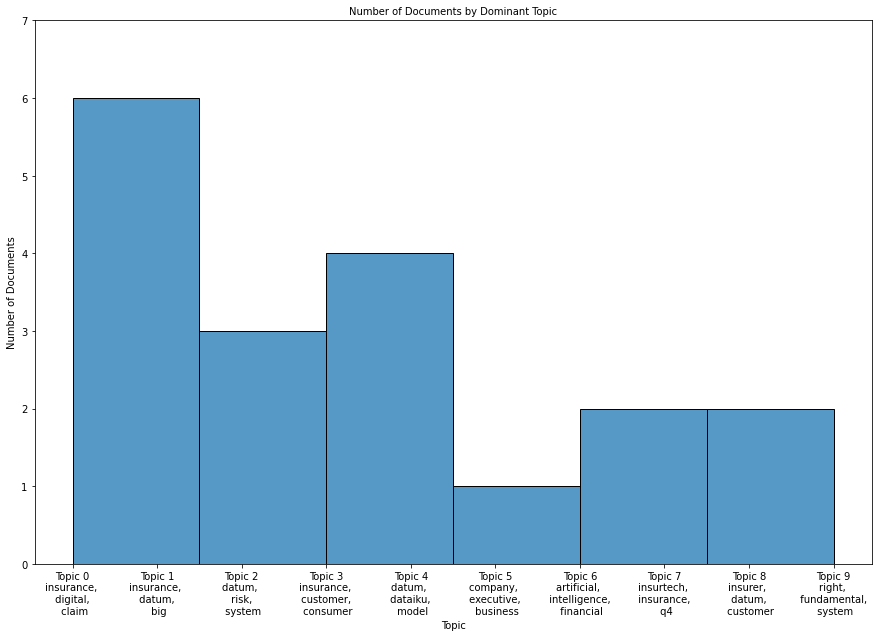

In [143]:
# Plot
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

plt.figure(figsize=(15,10))
# Topic Distribution by Dominant Topics
ax=sea.histplot(data=topics_df,x=topics_df.Topic)
ax.set_xticks(range(topics_df.Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax.xaxis.set_major_formatter(tick_formatter)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
ax.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax.set_ylabel('Number of Documents')
ax.set_ylim(0, 7)